- Which sport disciplines have the most events scheduled?
- How are medal events distributed across the days of the Olympics?
- What is the typical duration of different types of events?
- Which venues host the most events?
- How does the schedule vary by day of the week?
- What proportion of scheduled sessions are training versus competition?

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../data/schedule.csv")

In [4]:
df.head()

,date,discipline_code,discipline_name,event_code,event_description,start_datetime_local,end_datetime_local,start_datetime_utc,end_datetime_utc,is_medal_event,...,venue_code,venue_name,venue_slug,location_name,location_code,session_code,estimated_start,day_of_week,start_time,end_time
0,2026-02-04,ALP,Alpine Skiing,ALPMDH----------------TRNO000100--,Men's Downhill 1st Official Training,2026-02-04T11:30:00Z,2026-02-04T13:30:00Z,2026-02-04T10:30:00Z,2026-02-04T12:30:00Z,False,...,SSC,Stelvio Ski Centre,stelvio-ski-centre,Stelvio Ski Centre-ALP Course,SAL,OALPTA,False,Wednesday,11:30:00,13:30:00
1,2026-02-04,ALP,Alpine Skiing,ALPMDH----------------TRNO000200--,Men's Downhill 2nd Official Training,2026-02-05T11:30:00Z,2026-02-05T13:30:00Z,2026-02-05T10:30:00Z,2026-02-05T12:30:00Z,False,...,SSC,Stelvio Ski Centre,stelvio-ski-centre,Stelvio Ski Centre-ALP Course,SAL,OALPTC,False,Wednesday,11:30:00,13:30:00
2,2026-02-04,ALP,Alpine Skiing,ALPWDH----------------TRNO000100--,Women's Downhill 1st Official Training,2026-02-05T11:30:00Z,2026-02-05T13:30:00Z,2026-02-05T10:30:00Z,2026-02-05T12:30:00Z,False,...,CAL,Tofane Alpine Skiing Centre,tofane-alpine-skiing-centre,Tofane Alpine Skiing Centre,CAL,OALPTB,False,Wednesday,11:30:00,13:30:00
3,2026-02-04,CUR,Curling,CURXTEAM2-------------PREL000101--,Mixed Doubles Round Robin Session 1,2026-02-04T19:05:00Z,2026-02-04T21:05:00Z,2026-02-04T18:05:00Z,2026-02-04T20:05:00Z,False,...,CCU,Cortina Curling Olympic Stadium,cortina-curling-olympic-stadium,Curling Stadium - Sheet A,CUA,OCUR01,False,Wednesday,19:05:00,21:05:00
4,2026-02-04,CUR,Curling,CURXTEAM2-------------PREL000102--,Mixed Doubles Round Robin Session 1,2026-02-04T19:05:00Z,2026-02-04T21:05:00Z,2026-02-04T18:05:00Z,2026-02-04T20:05:00Z,False,...,CCU,Cortina Curling Olympic Stadium,cortina-curling-olympic-stadium,Curling Stadium - Sheet B,CUB,OCUR01,False,Wednesday,19:05:00,21:05:00


In [6]:
df.duplicated().sum()
df.isna().sum()

date                     0
discipline_code          0
discipline_name          0
event_code               0
event_description        0
start_datetime_local     0
end_datetime_local       0
start_datetime_utc       0
end_datetime_utc         0
is_medal_event           0
is_training              0
venue_code              63
venue_name              63
venue_slug              63
location_name            0
location_code            0
session_code             0
estimated_start          0
day_of_week              0
start_time               0
end_time                 0
dtype: int64

<Axes: xlabel='discipline_name'>

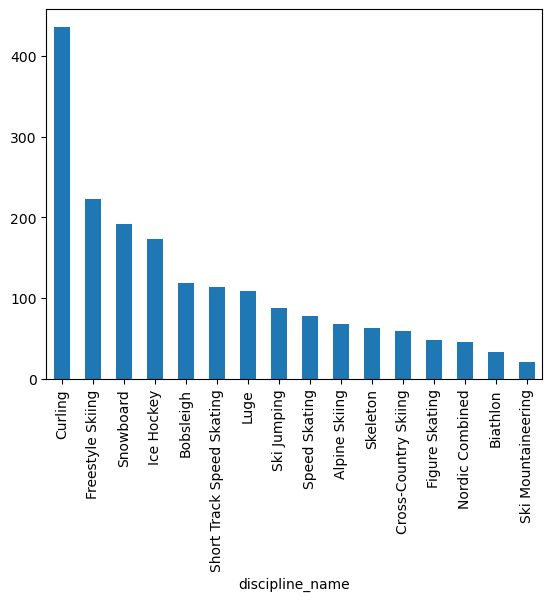

In [9]:
df['discipline_name'].value_counts().plot(kind="bar")

In [44]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

<Axes: xlabel='date', ylabel='Count'>

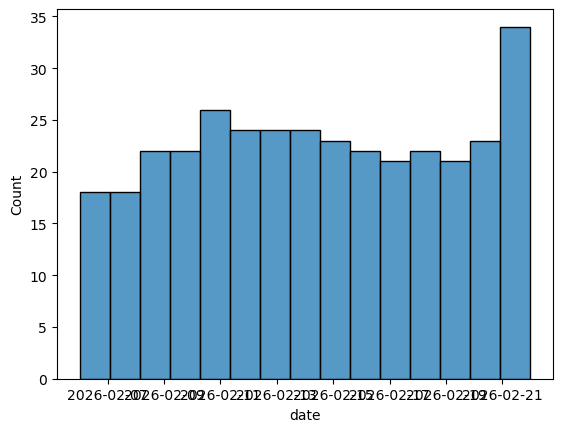

In [51]:
sns.histplot(df[df['is_medal_event'] == True], x="date", bins = 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  1866 non-null   object
 1   discipline_code       1866 non-null   object
 2   discipline_name       1866 non-null   object
 3   event_code            1866 non-null   object
 4   event_description     1866 non-null   object
 5   start_datetime_local  1866 non-null   object
 6   end_datetime_local    1866 non-null   object
 7   start_datetime_utc    1866 non-null   object
 8   end_datetime_utc      1866 non-null   object
 9   is_medal_event        1866 non-null   bool  
 10  is_training           1866 non-null   bool  
 11  venue_code            1803 non-null   object
 12  venue_name            1803 non-null   object
 13  venue_slug            1803 non-null   object
 14  location_name         1866 non-null   object
 15  location_code         1866 non-null   

In [29]:
df['start_time'] = pd.to_datetime(df['start_time'], format="%H:%M:%S")
df['end_time'] = pd.to_datetime(df['end_time'], format="%H:%M:%S")

In [96]:
df['total_time'] = df['end_time'] - df['start_time']

In [98]:
df.groupby('discipline_name')['total_time'].mean()

discipline_name
Alpine Skiing               0 days 01:48:05.294117647
Biathlon                    0 days 01:08:38.181818181
Bobsleigh                   0 days 00:54:03.050847457
Cross-Country Skiing        0 days 00:57:51.864406779
Curling                     0 days 02:40:19.266055045
Figure Skating                 0 days 02:22:22.500000
Freestyle Skiing            0 days 00:29:06.486486486
Ice Hockey                            0 days 02:30:00
Luge                        0 days 00:34:38.532110091
Nordic Combined                       0 days 01:08:56
Short Track Speed Skating   0 days 00:12:36.315789473
Skeleton                    0 days 00:53:34.285714285
Ski Jumping                 0 days 01:08:37.241379310
Ski Mountaineering          0 days 00:19:17.142857142
Snowboard                      0 days 00:26:21.562500
Speed Skating               0 days 00:37:18.461538461
Name: total_time, dtype: timedelta64[ns]

In [59]:
df['venue_slug'].value_counts()

venue_slug
cortina-curling-olympic-stadium        436
livigno-snow-park                      297
cortina-sliding-centre                 290
milano-ice-skating-arena               162
predazzo-ski-jumping-stadium           113
milano-santagiulia-ice-hockey-arena     88
livigno-aerials-moguls-park             83
milano-speed-skating-stadium            78
milano-rho-ice-hockey-arena             71
tesero-cross-country-skiing-stadium     68
stelvio-ski-centre                      53
anterselva-biathlon-arena               33
tofane-alpine-skiing-centre             31
Name: count, dtype: int64

<Axes: xlabel='day_of_week', ylabel='Count'>

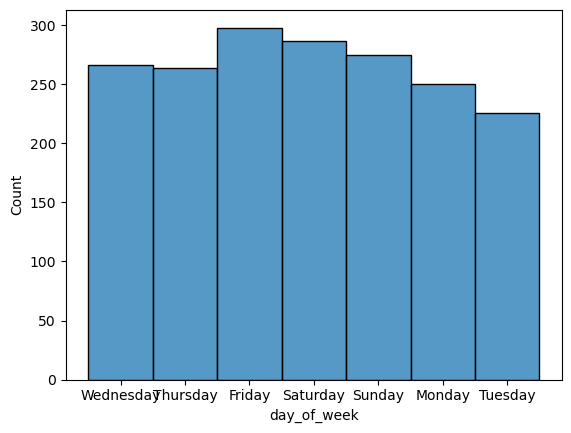

In [62]:
sns.histplot(df, x='day_of_week')

In [70]:
num_training = df[df['event_description'].str.contains('Training')].shape[0]
num_competition = df[-df['event_description'].str.contains('Training')].shape[0]

In [76]:
print(f"The proportion of training events {num_training / df.shape[0]:.2f}")
print(f"The proportion of competition events {num_competition/ df.shape[0]:.2f}")

The proportion of training events 0.13
The proportion of competition events 0.87
